In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import matplotlib.colors as col

In [6]:
df = pd.read_excel('data.xls')
df.head()

,Unnamed: 0,Price,Area,Longitude,Latitude,Bedrooms,Livingrooms,Bathrooms,Floor,NextToSubway,Exquisite,OpenForVisits
0,0,6700,65.00,121.489484,31.240373,2.0,0,NaN,NaN,1.0,NaN,NaN
1,1,8500,91.00,121.460855,31.295211,2.0,2,NaN,NaN,1.0,NaN,NaN
2,2,2600,56.07,121.440338,31.419139,2.0,1,NaN,NaN,0.0,NaN,NaN
3,3,5500,84.00,121.460855,31.295211,2.0,2,NaN,NaN,1.0,NaN,NaN
4,4,6800,78.00,121.543922,31.278916,1.0,2,NaN,NaN,1.0,NaN,NaN


In [12]:
df = df[['Longitude', 'Latitude', 'Price']]
# df = df.rename(columns={"Longitude": "lng", "Latitude": "lat"})
df.drop(df[df['Longitude'] < 120.81].index, inplace = True)
df.drop(df[df['Longitude'] > 122.12].index, inplace = True)
df.drop(df[df['Latitude'] < 30.90].index, inplace = True)
df.drop(df[df['Latitude'] > 31.53].index, inplace = True)
df.drop(df[df['Price'] > 40000].index, inplace = True)
df = df.sort_values(by=['Price'])
df.head()

,Longitude,Latitude,Price
2201,121.181853,31.233416,500
464,121.648976,30.913421,550
1115,121.298257,31.211143,550
2212,121.759685,31.034120,600
1314,121.747986,31.028999,600


In [13]:
endcolor = "#ed4c4c"
midcolor = '#4ced4c'
startcolor = '#6498ef'
cmap2 = col.LinearSegmentedColormap.from_list('own2',[startcolor,midcolor,endcolor])
# extra arguments are N=256, gamma=1.0
cm.register_cmap(cmap=cmap2)
# we can skip name here as it was already defined 

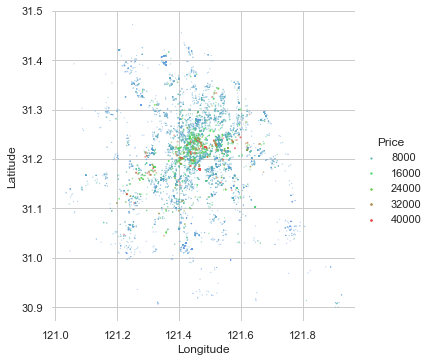

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="Longitude", y="Latitude",
    hue="Price",
    palette='own2',
    size='Price',
    sizes=(1,3),
    edgecolor=None,
    s=1,
    alpha=.5
)
# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
g.savefig("qqq.png")

In [15]:
df['Price_m'] = df['Price']//1000*1000
df.head()

,Longitude,Latitude,Price,Price_m
2201,121.181853,31.233416,500,0
464,121.648976,30.913421,550,0
1115,121.298257,31.211143,550,0
2212,121.759685,31.034120,600,0
1314,121.747986,31.028999,600,0


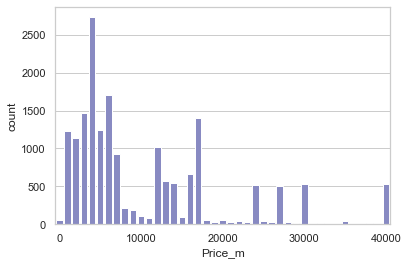

In [16]:

import matplotlib.ticker as ticker
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Price_m", data=df, palette=['#7E81CC'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

In [16]:
df.shape

(19404, 3)